1 Import Data and Required Packages

In [36]:
#Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Feature Engineering
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score


from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings

Import the CSV Data as Pandas DataFrame

In [37]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


2. Feature Engineering

2.1 Handling the imbalance of data using SMOTE

The SMOTE(Synthetic Minority Oversampling Technique) algorithm works like this:

You select a random sample from the minority group. You will determine the k nearest neighbours for the observations in this sample. Then, using one of those neighbours, you will determine the vector between the current data point and the chosen neighbour. The vector is multiplied by a random number between 0 and 1. You add this to the current data point to get the synthetic data point. This operation is essentially the same as moving the data point slightly in the direction of its neighbour. This ensures that your synthetic data point is not an exact replica of an existing data point, while also ensuring that it is not too dissimilar from known observations in your minority class.

In [38]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from imblearn.over_sampling import SMOTE

# Initialise SMOTE object
smote = SMOTE()

In [40]:
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [41]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]

y = df['Default']

In [42]:
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [43]:
# Combine balanced X and y
df_final = pd.DataFrame(X_smote, columns=df.columns[:-1])
df_final['Default'] = y_smote

In [44]:
df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<AxesSubplot:xlabel='Default', ylabel='count'>

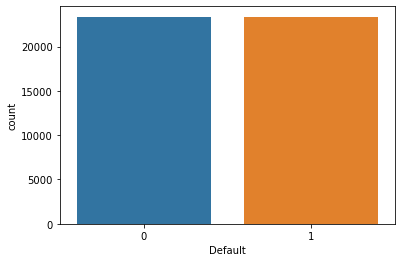

In [45]:
#plot to check if the dataframe is balanced after smote
sns.countplot('Default', data = df_final)

In [46]:
df_final.Default.value_counts()

1    23364
0    23364
Name: Default, dtype: int64

In [47]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})

In [48]:
# Change column names PAY_0 to PAY_6
df_final.rename(columns={'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
df_final['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df_final.EDUCATION.value_counts()

University     22707
Graduation     17899
High_School     5607
Others           515
Name: EDUCATION, dtype: int64

In [50]:
df_final['MARRIAGE'].replace({0:3}, inplace=True)
df_final.MARRIAGE.value_counts()

Married    25858
Single     20475
Others       395
Name: MARRIAGE, dtype: int64

In [51]:
df_final.shape

(46728, 25)

2.2 Encoding categorical variables

In [52]:
# Encoding categorical variables
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'])
df_final.head()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,Default,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,1,0,0,0,0,1,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,1,0,0,0,0,1,0,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,0,1,0,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,1,0,0,0,0,1,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,0,1,0,0,0,1,1,0,0


In [53]:
# We drop the column ID as it is of not use for our modeling
df_final.drop('ID',axis = 1, inplace = True)

In [54]:
df_final.shape

(46728, 30)

3. Model-1 : Basic Model with all features

In [55]:
# Rearrange columns in dataframe before submitting for modeling
df_final = df_final[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL',
                     'PAY_MAY',
                     'PAY_JUNE',
                     'PAY_JULY',
                     'PAY_AUG',
                     'PAY_SEPT',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'Default']]
     

In [56]:
#df_model = df_final.sample(frac=0.10, random_state=100)
# Create a copy of df_final
df_model = df_final.copy()
df_model.head()

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT,Default
0,0,1,0,0,1,0,0,1,0,24,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,0,1,0,0,1,0,1,0,0,26,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,0,1,0,0,1,0,1,0,0,34,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,0,1,0,0,1,0,0,1,0,37,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,1,0,0,0,1,0,0,1,0,57,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [57]:
## separate dataset into train and test
X = df_model.drop(columns=['Default'], axis=1)
y = df_model['Default']

In [58]:
#standardise the x value by using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
#split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((37382, 29), (9346, 29))

Modelling

a) Logistic Regression

In [85]:
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, roc_auc_score,cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay

In [97]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

pred_logit= logit.predict(X_test)



print("Logit model's accuracy:", accuracy_score(y_test, pred_logit))

print(classification_report(y_test, pred_logit))





Logit model's accuracy: 0.7221271132035095
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4664
           1       0.72      0.72      0.72      4682

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



In [99]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
print('Decision Tree Accuracy :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))



Decision Tree Accuracy : 0.7285469719666168
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      4664
           1       0.74      0.70      0.72      4682

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346



In [101]:
rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))



Random Forest Accuracy is: 0.8374705756473357
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4664
           1       0.85      0.82      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



In [102]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))

XGBoost Accuracy: 0.7852557243740638
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      4664
           1       0.81      0.75      0.78      4682

    accuracy                           0.79      9346
   macro avg       0.79      0.79      0.78      9346
weighted avg       0.79      0.79      0.78      9346



Hyper parameter turning:

In [103]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [104]:
random_search=RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [105]:
# Best estimators:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=10,
              min_child_weight=5)

In [106]:
#  best param
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [107]:
classifier=XGBClassifier(objective='binary:logistic',
                                  min_child_weight=3,
                                 max_depth=10,
                                 learning_rate=0.25,
                                 gamma=0.1,
                                  colsample_bynode=1,
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10,
              min_child_weight=3, use_label_encoder=False)

In [108]:
# Predicting model
hyper_pred= classifier.predict(X_test)

print("The accuracy of the model is:", accuracy_score(y_test, hyper_pred))

The accuracy of the model is: 0.8345816392039375


Compare Model Performance:

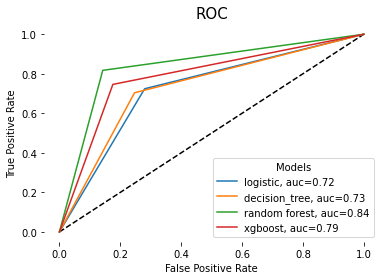

In [109]:
# logistic model 
pred_logit= logit.predict(X_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  pred_logit)
auc1 = metrics.roc_auc_score(y_test, pred_logit)

# decision tree model:
pred_tree = Tree.predict(X_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  pred_tree)
auc2 = metrics.roc_auc_score(y_test, pred_tree)

# random forest model: 
pred_rf= rf.predict(X_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  pred_rf)
auc3 = metrics.roc_auc_score(y_test, pred_rf)

# XGboost:
xgboost_pred= xgboost.predict(X_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  xgboost_pred)
auc4 = metrics.roc_auc_score(y_test, xgboost_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="random forest, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="xgboost, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()

In [113]:
data = {'logistic':72.21,
                'decision_tree':72.85,
               'randome_forest': 83.74,
                'xgboost': 78.52,
               'xgboost_hyper':83.45}
courses = list(data.keys())
values = list(data.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

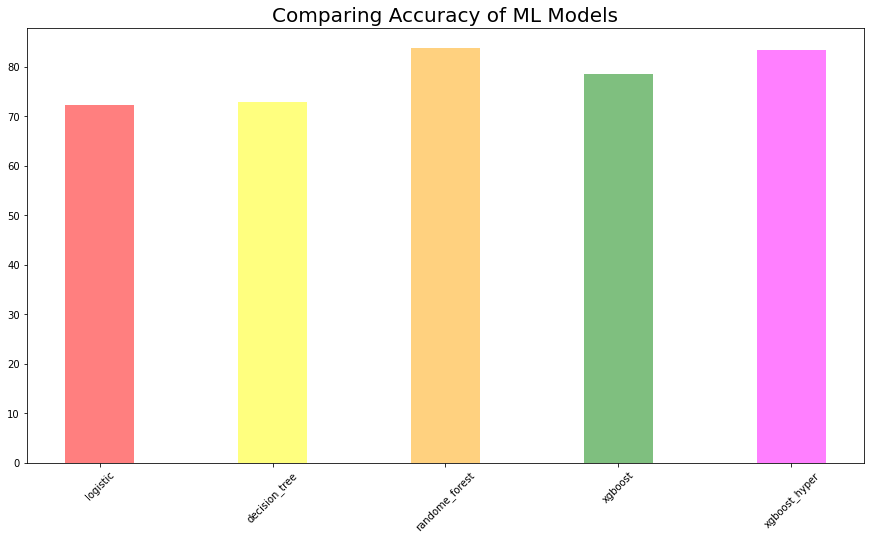

In [114]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta'
    ]
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)

In [60]:
models = {
    "logit": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": xgb.XGBClassifier(), 
}
model_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
   

Here, we are going to consider Recall Score as our evaluation metric, since we are more considered about predicting maximum number of actual defaulters.

In [69]:
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, roc_auc_score,cohen_kappa_score


In [70]:
# Calculate accuracy scores on train and test data
train_accuracy_score = accuracy_score(y_train_pred,y_train)
test_accuracy_score = accuracy_score( y_test_pred,y_test)

In [71]:
# Calculate precision scores on train and test data
train_precision_score = precision_score(y_train_pred,y_train)
test_precision_score = precision_score( y_test_pred,y_test)

In [72]:
# Calculate recall scores on train and test data
train_recall_score_rf = recall_score(y_train_pred,y_train)
test_recall_score_rf = recall_score( y_test_pred,y_test)

In [73]:
# Calculate f1 scores on train and test data
train_f1_score = f1_score(y_train_pred,y_train)
test_f1_score = f1_score( y_test_pred,y_test)

In [77]:
print(list(models.keys())[i])
model_list.append(list(models.keys())[i])

XGBClassifier


In [78]:
# Calculate cohen kappa scores on train and test data
#train_cohen_kappa_score = cohen_kappa_score(y_train_pred,y_train)
#test_cohen_kappa_score = cohen_kappa_score( y_test_pred,y_test)

In [79]:
# Print the recall scores
print("The accuracy score on train data is ", train_accuracy_score)
print("The accuracy score on test data is ", test_accuracy_score)
print("The precision score on train data is ", train_precision_score )
print("The precision score on test data is ",test_precision_score )
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 score on train data is ", train_f1_score)
print("The f1 score on test data is ", test_f1_score)
#print("The cohen kappa score on train data is " train_cohen_kappa_score)
#print("The cohen kappa score on test data is " test_cohen_kappa_score)

The accuracy score on train data is  0.7882670804130331
The accuracy score on test data is  0.7852557243740638
The precision score on train data is  0.7493309067551654
The precision score on test data is  0.7462622810764631
The recall on train data is  0.8124310835122744
The recall on test data is  0.8101089728727104
The f1 score on train data is  0.7796062707097708
The f1 score on test data is  0.7768760422456921


In [83]:
# Evaluate Train and Test dataset
train_accuracy_score , train_precision_score, train_recall_score_rf, train_f1_score = evaluate_model(y_train, y_train_pred)

NameError: name 'evaluate_model' is not defined

In [81]:
pd.DataFrame(list(zip(model_list, )), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

NameError: name 'r2_list' is not defined